# Analysis on data aquired

<p>In this notebook we analyze the data parse from all source found in order to explain how during this COVID-19 epidemic the country around the world have performed testo to found infect.<br>
First of all we rerun our notebook to reimport all data with the update.
</p>

[Errno 2] No such file or directory: 'data'
/Users/andre/Desktop/University/Masters/Second year/Second semester/Data Science for business/Lezioni/4° Lezione - 1° Lab/datasciencebusiness/data


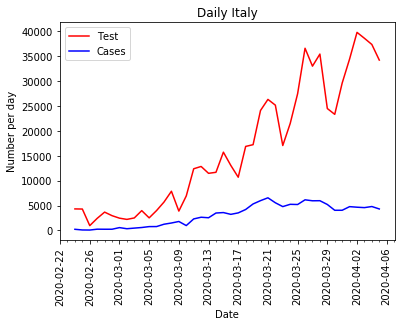

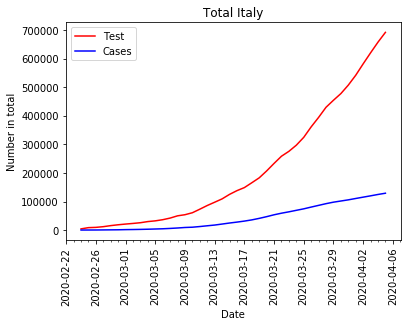

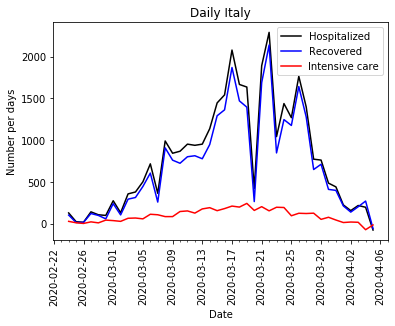

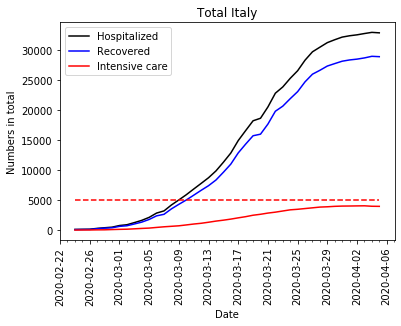

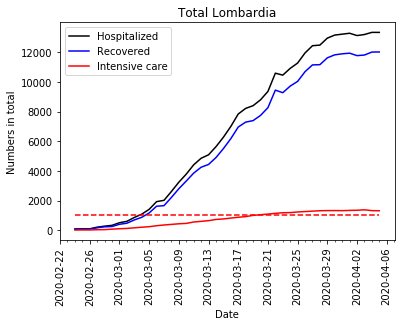

In [24]:
%cd data
%run italy_data.ipynb
%run usa_data.ipynb
%run uk_data.ipynb
%run brazil_data.ipynb
%run south_korea_data.ipynb
%run indonesia_data.ipynb
%run india_data.ipynb


# Import all sorted CSVs

In [106]:
import re
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [107]:
#Importare tutti i csv

states = ["india","italy","brazil","indonesia","south_korea","united_kingdom","usa"]

state_csv = {}
italian_regions_csv = {}

for state in states:
    path = os.getcwd() + "/parsed_data/"
    path += state + "/" + state + ".csv" 
    state_csv[state] = pd.read_csv(path, index_col = 0)
    
path = os.getcwd() + "/parsed_data/italy/"

all_csv = glob.glob(path + "*.csv")
all_csv.remove(path + "italy.csv")

for file in all_csv:
    result = re.search('italy/(.*).csv', file)
    italian_regions_csv[result.group(1)] = pd.read_csv(file, index_col = 0)

# Plot data

                total_test  total_cases
india                43558          519
italy               296964        69176
brazil               27392         2236
indonesia             3332          685
south_korea         348582         9037
united_kingdom      103393        16154
usa                 359165        51954


Text(0.5, 1.0, 'Barplot of total test and cases on 24/03/2020')

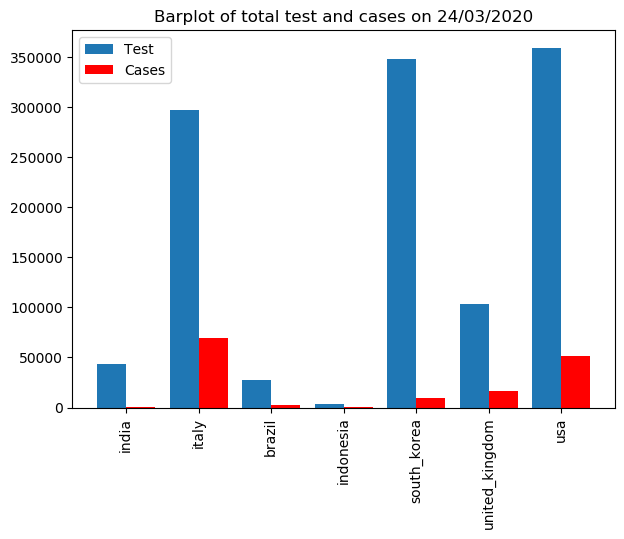

In [160]:
data = []
index_state = []

for state in state_csv:
    index_state.append(state)
    ix = state_csv[state].index.get_loc("2020-03-24")
    test = state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_test")]
    cases = state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_cases")]
    temp = {"total_test":test,"total_cases":cases}
    data.append(temp)
                     
df = pd.DataFrame(data, index = index_state, columns = ["total_test", "total_cases"]) 

print(df)

fig, axes = plt.subplots(figsize=(7,5), dpi=100)

ind = np.arange(len(df.index))
plt.bar(ind-0.2, width=0.4, height=df.total_test)
plt.bar(ind+0.2, width=0.4, height=df.total_cases, color = "r")
plt.legend(["Test", "Cases"])

idx = df.index.values
idx = np.insert(idx, 0, "null") #Just to shift elements
axes.set_xticklabels(idx)

plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
plt.title('Barplot of total test and cases on 24/03/2020')

Text(0.5, 1.0, 'Barplot of total test and cases on 24/03/2020 in %')

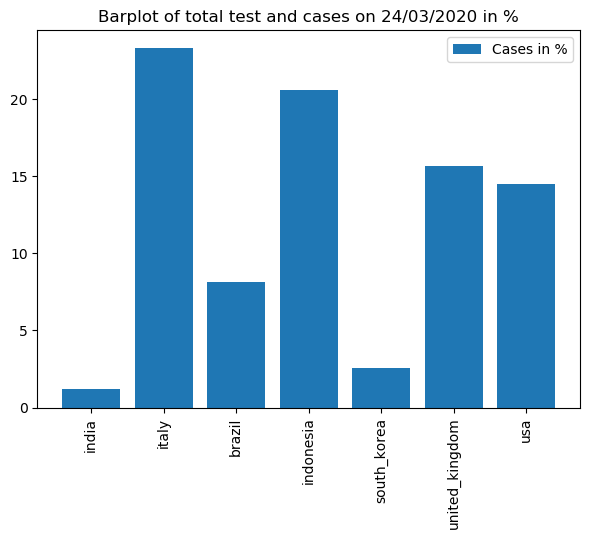

In [161]:
data = []
index_state = []

for state in state_csv:
    index_state.append(state)
    ix = state_csv[state].index.get_loc("2020-03-24")
    test = 100/state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_test")]
    cases = test*state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_cases")]
    temp = {"total_test":test,"total_cases":cases}
    data.append(temp)
                     
df = pd.DataFrame(data, index = index_state, columns = ["total_test", "total_cases"]) 

fig, axes = plt.subplots(figsize=(7,5), dpi=100)

plt.bar(df.index, height=df.total_cases)
plt.legend(["Cases in %"])



plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
plt.title('Barplot of total test and cases on 24/03/2020 in %')

# Time series

Paragoniamo il numero di casi totali con il numero di casi guariti e deceduti per ogni nazione, mettendo in comparazione le due curve nel lasso di tempo.

I dati del brasile sono sbagliati

india


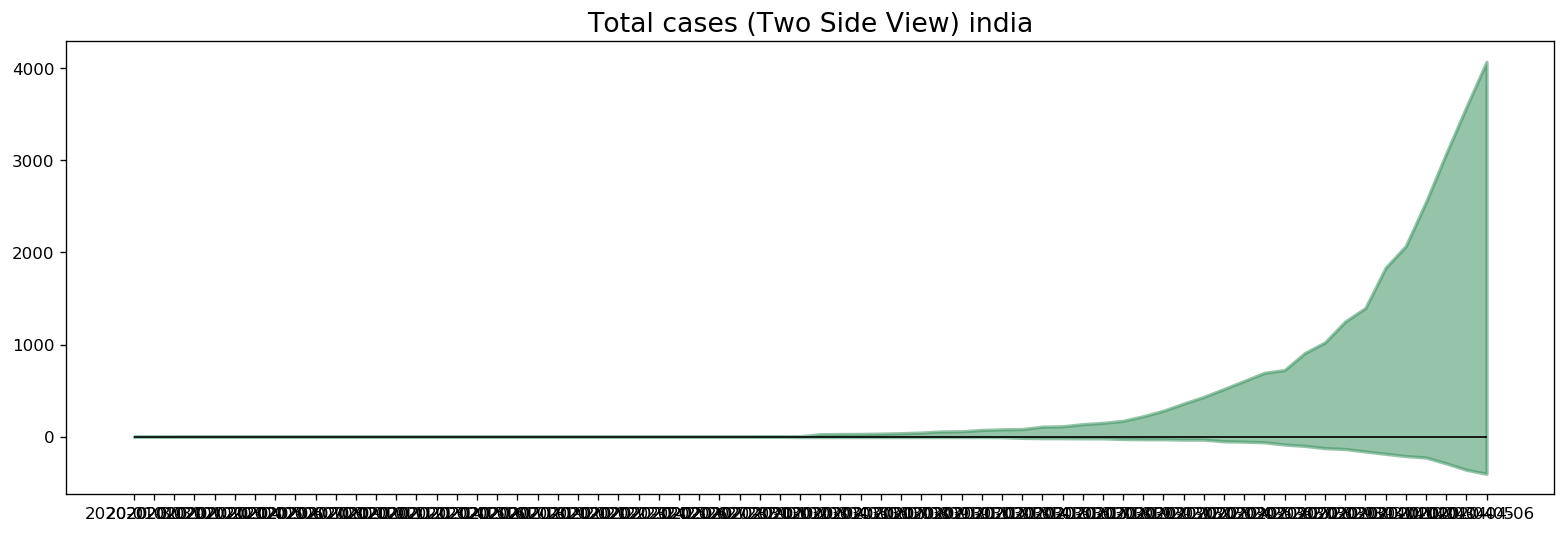

italy


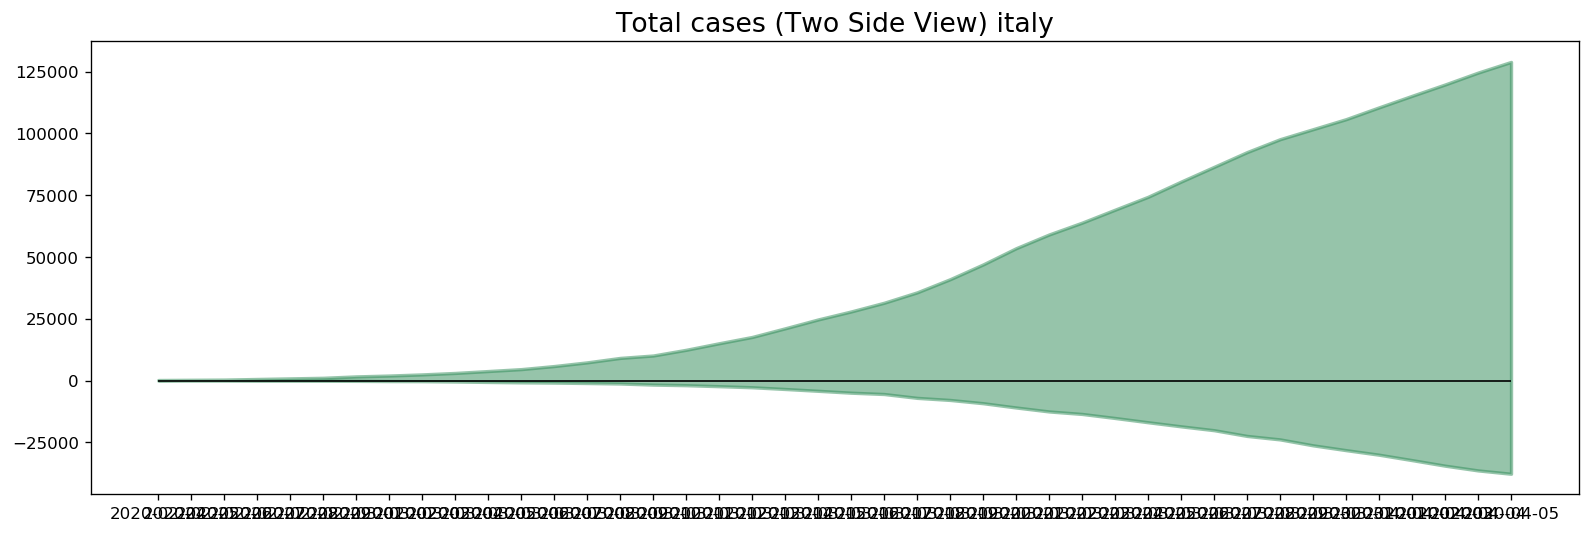

brazil


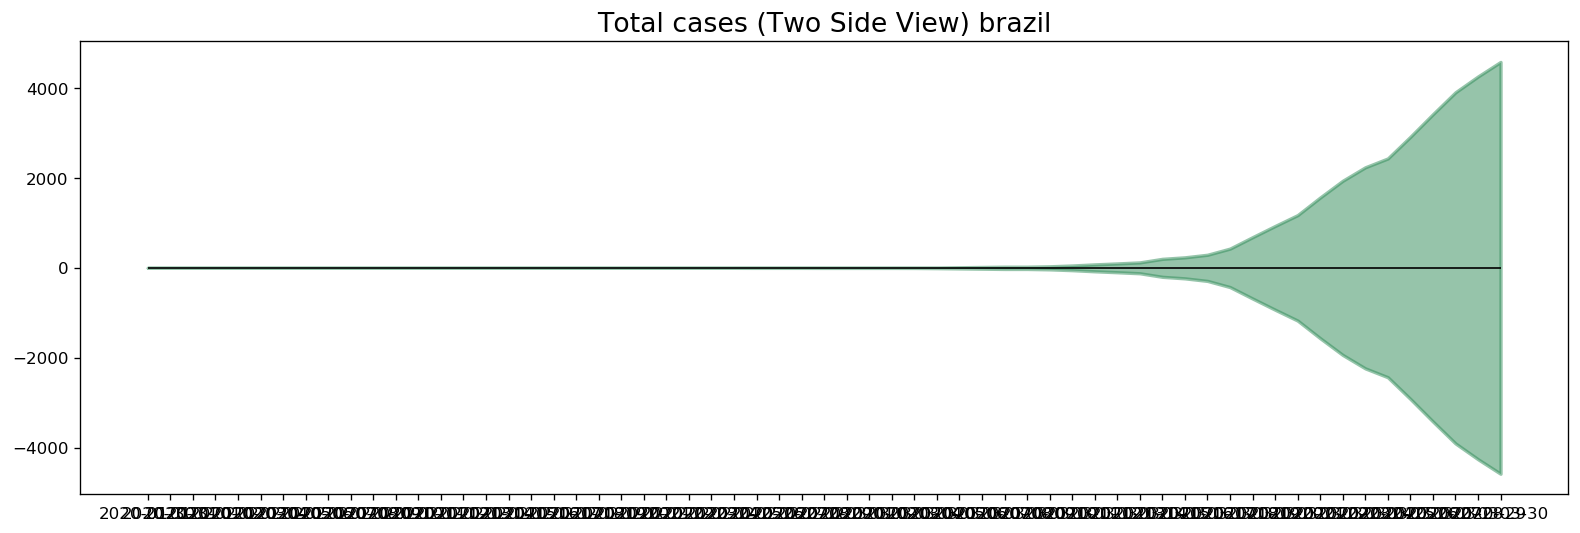

indonesia


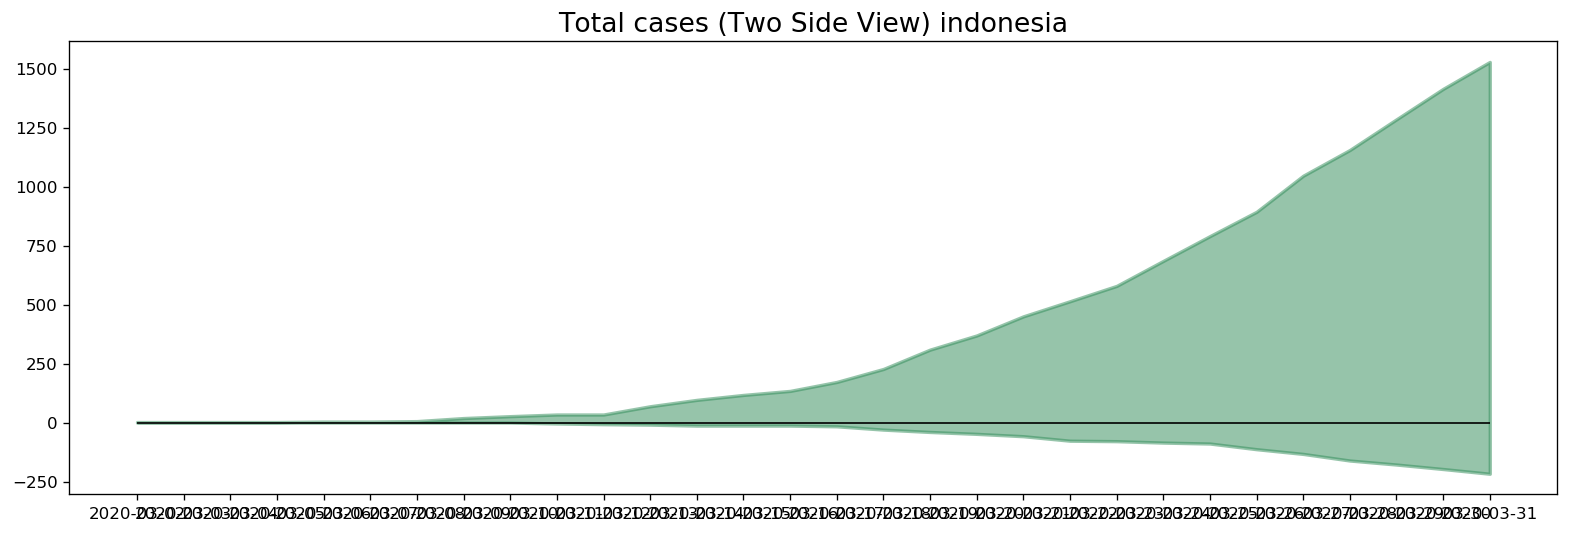

south_korea


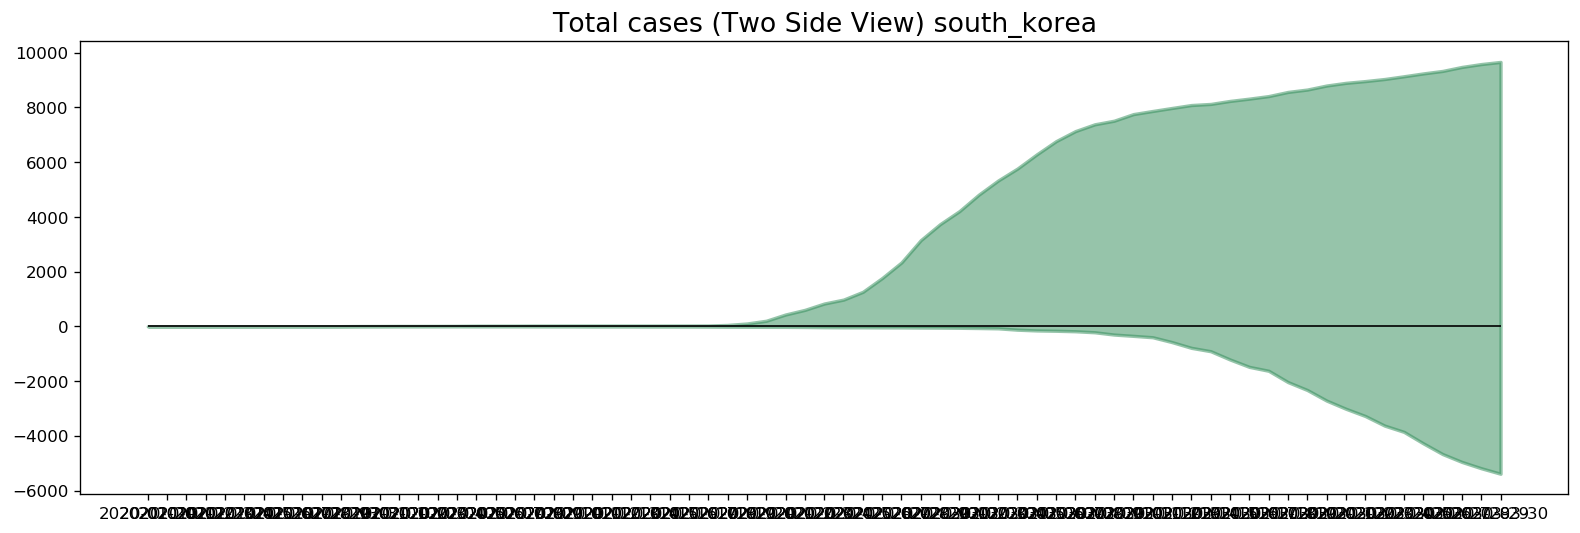

united_kingdom


In [177]:
for state in state_csv:
    print(state)
    x = state_csv[state].index
    y1 = state_csv[state].total_cases.values
    try:
        y2 = state_csv[state].total_healed.values + state_csv[state].total_dead.values
    except:
        try:
            y2 = (state_csv[state].total_cases.values - state_csv[state].actual_cases.values)
        except:
            break
            
    fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
    plt.fill_between(x, y1=y1, y2=-y2, alpha=0.5, linewidth=2, color='seagreen')
    plt.title('Total cases (Two Side View) ' + state, fontsize=16)
    plt.hlines(y=0, xmin=np.min(state_csv[state].index), xmax=np.max(state_csv[state].index), linewidth=1)
    plt.show()